In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    RocCurveDisplay
)


In [2]:
df = pd.read_csv('KMDC.csv')

C:\Users\20130\AppData\Local\Temp\ipykernel_20680\1782466805.py:1: DtypeWarning: Columns (77) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('KMDC.csv')


In [3]:
df = df.drop('Unnamed: 0',axis=1)

In [4]:
df.head()

,kmdc_index,M_s,R_s,c_1,c_2,R_p/R_s,R_pJ,R_pE,M_pE,rho_p,...,E_BR*_rowe,e_BR*_rowe,BM*_rowe,E_BM*_rowe,e_BM*_rowe,Blog(g)*_rowe,E_Blog(g)*_rowe,e_Blog(g)*_rowe,BZ*_rowe,e_BZ*_rowe
0,2449.02_105,0.858859,0.809710,0.532269,0.111874,0.009098,0.073337,0.821971,0.851942,8.430102,...,0.02,0.02,0.87,0.03,0.04,4.557,0.02,0.028,-0.153,0.114
1,2449.02_398,0.923758,0.820721,0.511484,0.158161,0.009336,0.076281,0.854969,2.277077,20.022549,...,0.02,0.02,0.87,0.03,0.04,4.557,0.02,0.028,-0.153,0.114
2,2449.02_685,0.864043,0.865759,0.525847,0.129080,0.010806,0.093138,1.043905,1.516054,7.323590,...,0.02,0.02,0.87,0.03,0.04,4.557,0.02,0.028,-0.153,0.114
3,2449.02_198,0.839861,0.833463,0.530099,0.086580,0.008590,0.071274,0.798848,1.332055,14.358926,...,0.02,0.02,0.87,0.03,0.04,4.557,0.02,0.028,-0.153,0.114
4,2449.02_615,0.878105,0.805500,0.553909,0.142785,0.008973,0.071951,0.806434,0.098876,1.036034,...,0.02,0.02,0.87,0.03,0.04,4.557,0.02,0.028,-0.153,0.114


In [5]:
df.shape

(1665000, 159)

In [6]:
### Columns: description [unit] (type)
# kmdc_index: Unique row index in KMDC file [KOI_chisqrank] (str)
# M_s: Stellar mass [solar masses] (float)
# R_s: Stellar radius [solar radii] (float)
# c_1: Limb darkening coefficient 1 (float, unitless)
# c_2: Limb darkening coefficient 2 (float, unitless)
# R_p/R_s: Planet-to-star radius ratio (float)
# R_pJ: Planet radius [Jupiter radii] (float)
# R_pE: Planet radius [Earth radii] (float)
# M_pE: Planet mass [Earth masses] (float)
# rho_p: Planet density [g/cm³] (float)
# rho_s: Stellar density [g/cm³] (float)
# M_p/M_s: Planet-to-star mass ratio (float)
# M_pJ: Planet mass [Jupiter masses] (float)
# sqrt(e)_cos(omega): √eccentricity × cos(ω) (float)
# sqrt(e)_sin(omega): √eccentricity × sin(ω) (float)
# i: Inclination [degrees] (float)
# Omega: Longitude of ascending node [degrees] (float)
# e: Orbital eccentricity (float)
# omega: Argument of periastron [degrees] (float)
# true_anomaly: True anomaly at observation [degrees] (float)
# eccentric_anomaly: Eccentric anomaly [degrees] (float)
# mean_anomaly: Mean anomaly [degrees] (float)
# mean_longitude: Mean longitude [degrees] (float)
# a_AU: Semi-major axis [AU] (float)
# a_R_s: Semi-major axis [stellar radii] (float)
# peri_AU: Periastron distance [AU] (float)
# peri_R_s: Periastron distance [stellar radii] (float)
# apo_AU: Apoastron distance [AU] (float)
# apo_R_s: Apoastron distance [stellar radii] (float)
# d_AU: Instantaneous star–planet distance [AU] (float)
# d_R_s: Instantaneous star–planet distance [stellar radii] (float)
# Period_days: Orbital period [days] (float)
# T_0: Transit center time [BJD] (float)
# b_trans: Transit impact parameter (float)
# b_occ: Occultation impact parameter (float)
# p_trans: Transit probability (float)
# p_occ: Occultation probability (float)
# T_total_hr: Total transit duration [hours] (float)
# T_full_hr: Full (flat-bottom) transit duration [hours] (float)
# K_RV: RV semi-amplitude [m/s] (float)
# occurrence_rate_hsu: Occurrence rate from Hsu et al. (2019) (float)
# E_or_hsu: Upper-bound on occurrence rate (float)
# e_or_hsu: Lower-bound on occurrence rate (float)
# hsu_flag: 1 = included in Hsu+2019; 0 = not included (int)
# multiplicity: Number of planets in system (int)
# P/Pin: Period ratio with inner planet (float)
# P/Pout: Period ratio with outer planet (float)
# Tdur/Tdurin: Transit duration ratio with inner planet (float)
# Tdur/Tdurout: Transit duration ratio with outer planet (float)
# R/Rin: Radius ratio with inner planet (float)
# R/Rout: Radius ratio with outer planet (float)
# M/Min: Mass ratio with inner planet (float)
# M/Mout: Mass ratio with outer planet (float)
# rho/rhoin: Density ratio with inner planet (float)
# rho/rhoout: Density ratio with outer planet (float)
# i-iin: Inclination difference with inner planet [degrees] (float)
# iout-i: Inclination difference with outer planet [degrees] (float)
# xiin: ξ stability metric with inner planet (float)
# xiout: ξ stability metric with outer planet (float)
# distin_hillrad: Distance to inner planet [Hill radii] (float)
# distout_hillrad: Distance to outer planet [Hill radii] (float)
# distin_hillrad_e: Same as above, eccentric orbit (float)
# distout_hillrad_e: Same as above, eccentric orbit (float)
# e/ein: Eccentricity ratio with inner planet (float)
# eout/e: Eccentricity ratio with outer planet (float)
# omega-omegain: ω difference with inner planet [degrees] (float)
# omegaout-omega: ω difference with outer planet [degrees] (float)
# dilute: Dilution factor in flux (unitless) (float)
# chisq: Chi-squared value of model fit (unitless) (float)
# Chain#: MCMC chain number (int)
# chisq_rank: Chi-squared rank within chain (int)
# step_number: MCMC step number (int)
# phodymm_index: Index that indicates the row of the PhoDyMM dqa file this draw was pulled from (int)
# planet: PhoDyMM planet number (float)
# KIC: Kepler Input Catalog ID (int)
# KOI: Kepler Object of Interest number (float)
# Kepler: Kepler planet name (string)
# Period_days_rowe: Orbital period from Rowe et al. (2024) [days] (float)
# e_Period_rowe: Error in Period_rowe (float)
# T0_rowe: Transit epoch from Rowe [BJD] (float)
# e_T0_rowe: Error in T0_rowe (float)
# Rp/R*_rowe: Radius ratio from Rowe (float)
# E_Rp/R*_rowe: Upper error in Rp/R*_rowe (float)
# e_Rp/R*_rowe: Uncertainty in Rp/R*_rowe (float)
# b_rowe: Impact parameter from Rowe (float)
# E_b_rowe: Upper error in b_rowe (float)
# e_b_rowe: Uncertainty in b_rowe (float)
# rho*M_rowe: Stellar density from transit fit [g/cm³] (float)
# E_rho*M_rowe: Upper error in rho*M_rowe (float)
# e_rho*M_rowe: Uncertainty in rho*M_rowe (float)
# u1_rowe: LD coefficient 1 from Rowe (float)
# u2_rowe: LD coefficient 2 from Rowe (float)
# TTVflag_rowe: TTV flag from Rowe (int; 0 or 1)
# nTTobs_rowe: Number of observed transit times (int)
# nTT_rowe: Total number of transits (int)
# TDepth_rowe: Transit depth [ppm] (float)
# e_TDepth_rowe: Error in transit depth (float)
# TDur_rowe: Transit duration [hours] (float)
# e_TDur_rowe: Error in TDur_rowe (float)
# ATDur_rowe: Adjusted transit duration [hours] (float)
# e_ATDur_rowe: Error in ATDur_rowe (float)
# S/N_rowe: Signal-to-noise ratio (float)
# MES_rowe: Multiple event statistic (float)
# S/NImp_rowe: Impact parameter S/N (float)
# chi2W_rowe: χ² with weights (float)
# chi2WO_rowe: χ² without weights (float)
# a/R*_rowe: Scaled semi-major axis (float)
# E_a/R*_rowe: Upper error in a/R*_rowe (float)
# e_a/R*_rowe: Uncertainty in a/R*_rowe (float)
# Inc_rowe: Inclination from Rowe [deg] (float)
# E_Inc_rowe: Upper error in Inc_rowe (float)
# e_Inc_rowe: Uncertainty in Inc_rowe (float)
# Rp_rowe: Planet radius [Earth radii] (float)
# E_Rp_rowe: Upper error in Rp_rowe (float)
# e_Rp_rowe: Uncertainty in Rp_rowe (float)
# S0_rowe: Insolation flux [Earth units] (float)
# E_S0_rowe: Upper error in S0_rowe (float)
# e_S0_rowe: Uncertainty in S0_rowe (float)
# Kmag_rowe: Kepler magnitude (float)
# rho*_rowe: Stellar density from Rowe (float)
# E_rho*_rowe: Upper error in rho*_rowe (float)
# e_rho*_rowe: Uncertainty in rho*_rowe (float)
# Teff_rowe: Effective temperature [K] (float)
# e_Teff_rowe: Error in Teff_rowe (float)
# R*_rowe: Stellar radius [solar radii] (float)
# E_R*_rowe: Upper error in R*_rowe (float)
# e_R*_rowe: Uncertainty in R*_rowe (float)
# M*_rowe: Stellar mass [solar masses] (float)
# E_M*_rowe: Upper error in M*_rowe (float)
# e_M*_rowe: Uncertainty in M*_rowe (float)
# log(g)*_rowe: Surface gravity [log10(cm/s²)] (float)
# E_log(g)*_rowe: Upper error in log(g)*_rowe (float)
# e_log(g)*_rowe: Uncertainty in log(g)*_rowe (float)
# Z*_rowe: Metallicity [Fe/H] (float)
# e_Z*_rowe: Uncertainty in Z*_rowe (float)
# Source_rowe: Source catalog or method (string)
# Status_rowe: Vetting status / disposition (string)
# BRp_rowe: Alternate radius [Earth radii] (float)
# E_BRp_rowe: Upper error in BRp_rowe (float)
# e_BRp_rowe: Uncertainty in BRp_rowe (float)
# BS0_rowe: Alternate insolation flux [Earth units] (float)
# E_BS0_rowe: Upper error in BS0_rowe (float)
# e_BS0_rowe: Uncertainty in BS0_rowe (float)
# Brho*_rowe: Alternate stellar density (float)
# E_Brho*_rowe: Upper error in Brho*_rowe (float)
# e_Brho*_rowe: Uncertainty in Brho*_rowe (float)
# BTeff_rowe: Alternate effective temperature [K] (float)
# e_BTeff_rowe: Uncertainty in BTeff_rowe (float)
# BR*_rowe: Alternate stellar radius [solar radii] (float)
# E_BR*_rowe: Upper error in BR*_rowe (float)
# e_BR*_rowe: Uncertainty in BR*_rowe (float)
# BM*_rowe: Alternate stellar mass [solar masses] (float)
# E_BM*_rowe: Upper error in BM*_rowe (float)
# e_BM*_rowe: Uncertainty in BM*_rowe (float)
# Blog(g)*_rowe: Alternate log(g) (float)
# E_Blog(g)*_rowe: Upper error in Blog(g) (float)
# e_Blog(g)*_rowe: Uncertainty in Blog(g) (float)
# BZ*_rowe: Alternate metallicity [Fe/H] (float)
# e_BZ*_rowe: Uncertainty in BZ*_rowe (float)


In [7]:
list(df.columns)

['kmdc_index',
 'M_s',
 'R_s',
 'c_1',
 'c_2',
 'R_p/R_s',
 'R_pJ',
 'R_pE',
 'M_pE',
 'rho_p',
 'rho_s',
 'M_p/M_s',
 'M_pJ',
 'sqrt(e)_cos(omega)',
 'sqrt(e)_sin(omega)',
 'i',
 'Omega',
 'e',
 'omega',
 'true_anomaly',
 'eccentric_anomaly',
 'mean_anomaly',
 'mean_longitude',
 'a_AU',
 'a_R_s',
 'peri_AU',
 'peri_R_s',
 'apo_AU',
 'apo_R_s',
 'd_AU',
 'd_R_s',
 'Period_days',
 'T_0',
 'b_trans',
 'b_occ',
 'p_trans',
 'p_occ',
 'T_total_hr',
 'T_full_hr',
 'K_RV',
 'occurrence_rate_hsu',
 'E_or_hsu',
 'e_or_hsu',
 'hsu_flag',
 'multiplicity',
 'P/Pin',
 'P/Pout',
 'Tdur/Tdurin',
 'Tdur/Tdurout',
 'R/Rin',
 'R/Rout',
 'M/Min',
 'M/Mout',
 'rho/rhoin',
 'rho/rhoout',
 'i-iin',
 'iout-i',
 'xiin',
 'xiout',
 'distin_hillrad',
 'distout_hillrad',
 'distin_hillrad_e',
 'distout_hillrad_e',
 'e/ein',
 'eout/e',
 'omega-omegain',
 'omegaout-omega',
 'dilute',
 'chisq',
 'Chain#',
 'chisq_rank',
 'step_number',
 'phodymm_index',
 'planet',
 'KIC',
 'KOI',
 'Kepler',
 'Period_days_rowe',
 'e

# Reduce to one sample per planet
### keep the best-fit draw per (KIC, planet) by minimum chisq

In [8]:
# Sort by chisq and keep the best row per (KIC, planet)
df_planets = (
    df.sort_values("chisq")
      .groupby(["KIC", "planet"], as_index=False)
      .first()
)

print("Shape after selecting best-fit per planet:", df_planets.shape)
df_planets.head()


Shape after selecting best-fit per planet: (1665, 159)


,KIC,planet,kmdc_index,M_s,R_s,c_1,c_2,R_p/R_s,R_pJ,R_pE,...,E_BR*_rowe,e_BR*_rowe,BM*_rowe,E_BM*_rowe,e_BM*_rowe,Blog(g)*_rowe,E_Blog(g)*_rowe,e_Blog(g)*_rowe,BZ*_rowe,e_BZ*_rowe
0,1432789,0.1,992.02_1,1.212619,1.545249,0.551484,0.099146,0.011940,0.183674,2.058647,...,0.08,0.07,1.13,0.09,0.08,4.127,0.046,0.055,0.188,0.145
1,1432789,0.2,992.01_1,1.212619,1.545249,0.551484,0.099146,0.017871,0.274914,3.081277,...,0.08,0.07,1.13,0.09,0.08,4.127,0.046,0.055,0.188,0.145
2,1717722,0.1,3145.02_1,0.661196,0.654297,0.622775,0.078221,0.012170,0.079270,0.888472,...,0.02,0.02,0.67,0.03,0.03,4.629,0.022,0.024,-0.281,0.108
3,1717722,0.2,3145.01_1,0.661196,0.654297,0.622775,0.078221,0.017841,0.116208,1.302481,...,0.02,0.02,0.67,0.03,0.03,4.629,0.022,0.024,-0.281,0.108
4,1718189,0.1,993.02_1,0.857055,0.783015,0.448666,0.132453,0.013869,0.108113,1.211743,...,0.01,0.01,0.85,0.02,0.04,4.572,0.014,0.022,-0.488,0.123


In [9]:
flag_col = "TTVflag_rowe"

def parse_ttvflag(flag):
    """Parse strings like 't0-6', 't119', 't0--' into three numeric digits (or NaN)."""
    if pd.isna(flag):
        return pd.Series([np.nan, np.nan, np.nan])
    
    s = str(flag).strip()
    if len(s) != 4 or s[0].lower() != 't':
        return pd.Series([np.nan, np.nan, np.nan])
    
    d1, d2, d3 = s[1], s[2], s[3]
    
    def conv(ch):
        if ch == '-':
            return np.nan
        try:
            return int(ch)
        except ValueError:
            return np.nan
    
    return pd.Series([conv(d1), conv(d2), conv(d3)])

df[["TTV_model_flag", "TTV_Holczer_flag", "TTV_Kane_flag"]] = df[flag_col].apply(parse_ttvflag)

In [10]:
target_col = "has_strong_TTV"

# Strong / interesting TTVs per Kane+ (7, 8, 9)
df[target_col] = (df["TTV_Kane_flag"] >= 7).astype("Int64")  # pandas nullable int

# Keep only rows where we actually know the target (i.e., Kane rated it)
df_ml = df.dropna(subset=["TTV_Kane_flag"]).copy()
df_ml[target_col] = (df_ml["TTV_Kane_flag"] >= 7).astype(int)

print(df_ml[target_col].value_counts())


has_strong_TTV
0    1127000
1     257000
Name: count, dtype: int64


In [11]:
df_ml

,kmdc_index,M_s,R_s,c_1,c_2,R_p/R_s,R_pJ,R_pE,M_pE,rho_p,...,e_BM*_rowe,Blog(g)*_rowe,E_Blog(g)*_rowe,e_Blog(g)*_rowe,BZ*_rowe,e_BZ*_rowe,TTV_model_flag,TTV_Holczer_flag,TTV_Kane_flag,has_strong_TTV
1000,2449.01_105,0.858859,0.809710,0.532269,0.111874,0.025004,0.201551,2.259008,14.194692,6.766510,...,0.04,4.557,0.020,0.028,-0.153,0.114,0.0,NaN,2.0,0
1001,2449.01_398,0.923758,0.820721,0.511484,0.158161,0.024084,0.196774,2.205476,1.989663,1.019212,...,0.04,4.557,0.020,0.028,-0.153,0.114,0.0,NaN,2.0,0
1002,2449.01_685,0.864043,0.865759,0.525847,0.129080,0.025156,0.216812,2.430064,58.073434,22.239061,...,0.04,4.557,0.020,0.028,-0.153,0.114,0.0,NaN,2.0,0
1003,2449.01_198,0.839861,0.833463,0.530099,0.086580,0.025519,0.211738,2.373187,56.489677,23.225507,...,0.04,4.557,0.020,0.028,-0.153,0.114,0.0,NaN,2.0,0
1004,2449.01_615,0.878105,0.805500,0.553909,0.142785,0.025511,0.204574,2.292893,55.890847,25.478945,...,0.04,4.557,0.020,0.028,-0.153,0.114,0.0,NaN,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1664995,1788.02_723,0.644418,0.690826,0.617696,0.079623,0.036662,0.252133,2.825947,0.676864,0.164817,...,0.03,4.596,0.023,0.020,-0.137,0.098,0.0,NaN,1.0,0
1664996,1788.02_896,0.710747,0.685493,0.626844,0.098492,0.034599,0.236114,2.646396,12.646946,3.749843,...,0.03,4.596,0.023,0.020,-0.137,0.098,0.0,NaN,1.0,0
1664997,1788.02_604,0.767907,0.688102,0.632111,0.116799,0.033964,0.232659,2.607672,6.781201,2.101550,...,0.03,4.596,0.023,0.020,-0.137,0.098,0.0,NaN,1.0,0
1664998,1788.02_368,0.712107,0.674424,0.631011,0.090462,0.036162,0.242790,2.721221,50.925969,13.888003,...,0.03,4.596,0.023,0.020,-0.137,0.098,0.0,NaN,1.0,0


In [12]:
target_col = "has_strong_TTV"
y = df_ml[target_col]

feature_groups = {
    "basic_orbital": [
        "Period_days_rowe",
        "a/R*_rowe",
        "Inc_rowe",
        "b_rowe",
        "TDur_rowe",
        "ATDur_rowe",
    ],
    "planet_props": [
        "Rp_rowe",
        "TDepth_rowe",
        "S0_rowe",
    ],
    "stellar_props": [
        "M*_rowe",
        "R*_rowe",
        "rho*_rowe",
        "Teff_rowe",
        "Z*_rowe",
        "Kmag_rowe",
    ],
    "architecture": [
        "multiplicity",
        "P/Pin", "P/Pout",
        "R/Rin", "R/Rout",
        "i-iin", "iout-i"
    ],
    "detection": [
        "S/N_rowe",
        "MES_rowe",
        "nTTobs_rowe",
        "nTT_rowe",
    ],
}

feature_cols = []
missing_cols = []

for group_name, cols in feature_groups.items():
    for col in cols:
        if col in df_ml.columns:
            feature_cols.append(col)
        else:
            missing_cols.append(col)

feature_cols = sorted(set(feature_cols))  # dedupe + sort

print("Number of feature columns used:", len(feature_cols))
print("feature columns:", feature_cols)

if missing_cols:
    print("\nColumns listed but NOT found in df_ml (they're just skipped):")
    print(sorted(set(missing_cols)))

X = df_ml[feature_cols].copy()


Number of feature columns used: 26
feature columns: ['ATDur_rowe', 'Inc_rowe', 'Kmag_rowe', 'M*_rowe', 'MES_rowe', 'P/Pin', 'P/Pout', 'Period_days_rowe', 'R*_rowe', 'R/Rin', 'R/Rout', 'Rp_rowe', 'S/N_rowe', 'S0_rowe', 'TDepth_rowe', 'TDur_rowe', 'Teff_rowe', 'Z*_rowe', 'a/R*_rowe', 'b_rowe', 'i-iin', 'iout-i', 'multiplicity', 'nTT_rowe', 'nTTobs_rowe', 'rho*_rowe']


In [13]:
missing_frac = X.isna().mean().sort_values(ascending=False)
print("Top 20 features by missing fraction:")
print(missing_frac.head(20))


Top 20 features by missing fraction:
ATDur_rowe          0.0
Inc_rowe            0.0
nTTobs_rowe         0.0
nTT_rowe            0.0
multiplicity        0.0
iout-i              0.0
i-iin               0.0
b_rowe              0.0
a/R*_rowe           0.0
Z*_rowe             0.0
Teff_rowe           0.0
TDur_rowe           0.0
TDepth_rowe         0.0
S0_rowe             0.0
S/N_rowe            0.0
Rp_rowe             0.0
R/Rout              0.0
R/Rin               0.0
R*_rowe             0.0
Period_days_rowe    0.0
dtype: float64


In [14]:
drop_features = [
    "e",
    "e/ein", "eout/e",
    "M/Min", "M/Mout",
    "rho/rhoin", "rho/rhoout",
    "xiin", "xiout",
    "distin_hillrad", "distout_hillrad",
    "distin_hillrad_e", "distout_hillrad_e",
]

pre_ttv_feature_cols = [c for c in feature_cols if c not in drop_features]

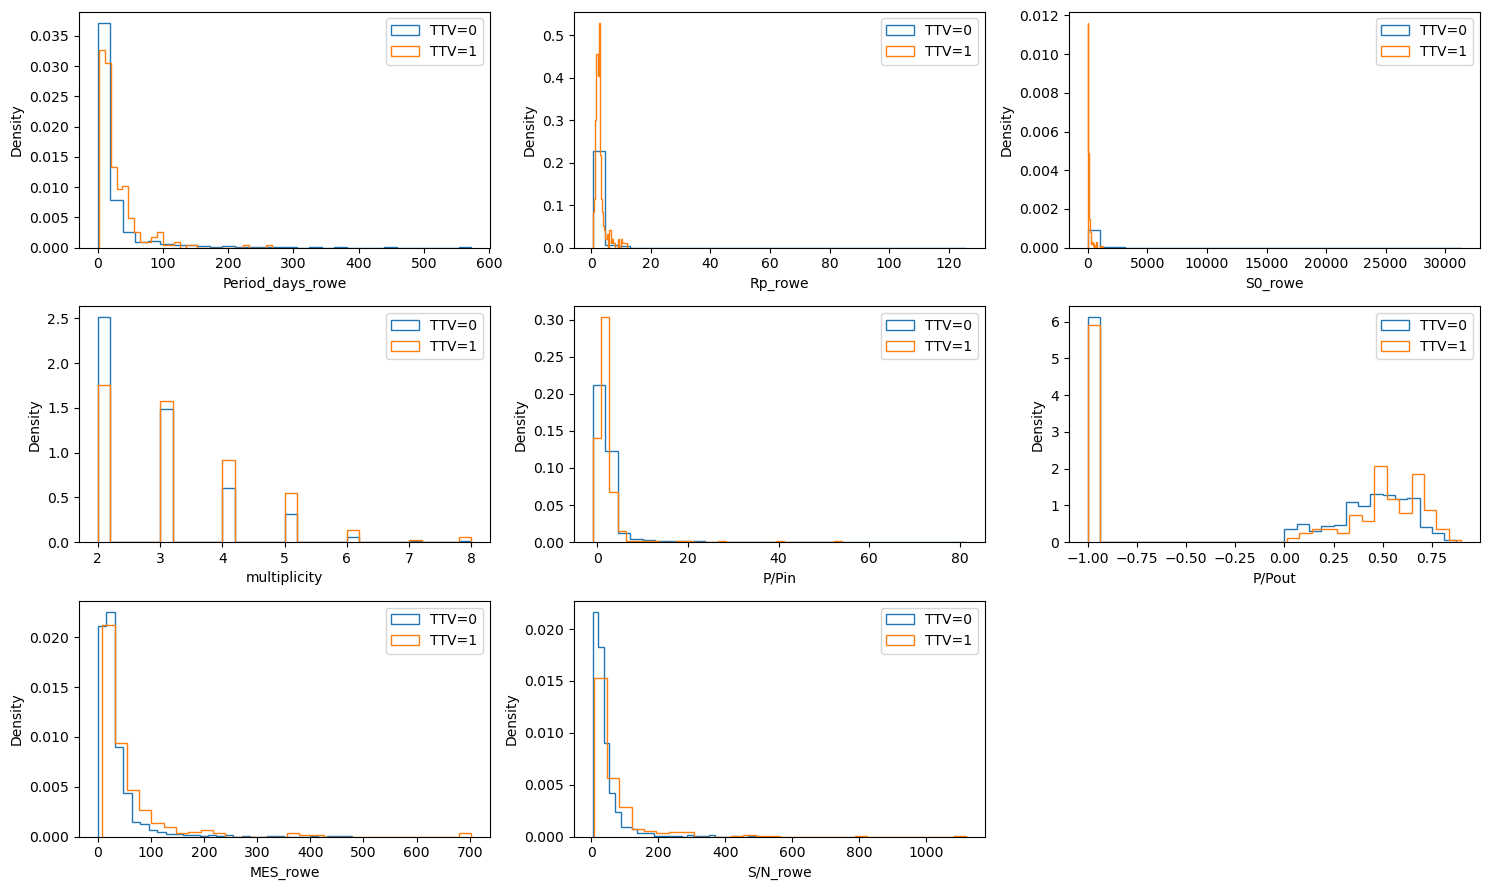

In [15]:
features_to_plot = [
    "Period_days_rowe",
    "Rp_rowe",
    "S0_rowe",
    "multiplicity",
    "P/Pin",
    "P/Pout",
    "MES_rowe",
    "S/N_rowe",
]

features_to_plot = [f for f in features_to_plot if f in pre_ttv_feature_cols]

ncols = 3
nrows = int(np.ceil(len(features_to_plot) / ncols))

plt.figure(figsize=(5 * ncols, 3 * nrows))

for i, feat in enumerate(features_to_plot, 1):
    plt.subplot(nrows, ncols, i)
    for label, data in df_ml.groupby(target_col):
        plt.hist(
            data[feat].dropna(),
            bins=30,
            histtype="step",
            density=True,
            label=f"TTV={label}",
        )
    plt.xlabel(feat)
    plt.ylabel("Density")
    plt.legend()
    plt.tight_layout()

plt.show()



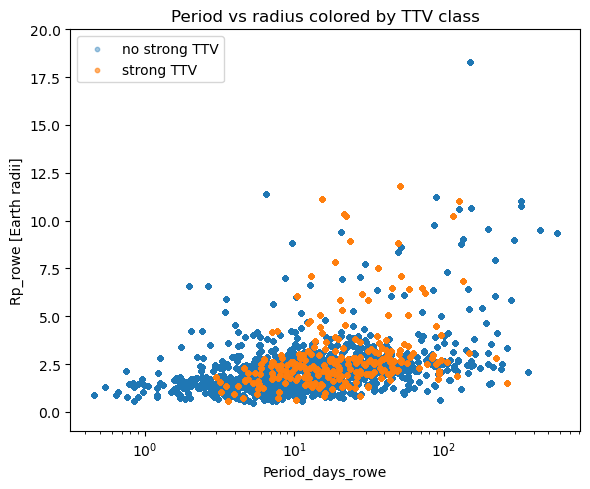

In [16]:
plt.figure(figsize=(6, 5))
mask_strong = df_ml[target_col] == 1

plt.scatter(
    df_ml.loc[~mask_strong, "Period_days_rowe"],
    df_ml.loc[~mask_strong, "Rp_rowe"],
    s=10,
    alpha=0.4,
    label="no strong TTV",
)
plt.scatter(
    df_ml.loc[mask_strong, "Period_days_rowe"],
    df_ml.loc[mask_strong, "Rp_rowe"],
    s=10,
    alpha=0.6,
    label="strong TTV",
)
plt.xscale("log")
plt.xlabel("Period_days_rowe")
plt.ylabel("Rp_rowe [Earth radii]")
plt.title("Period vs radius colored by TTV class")
plt.legend()
plt.ylim(-1,20)
plt.tight_layout()
plt.show()


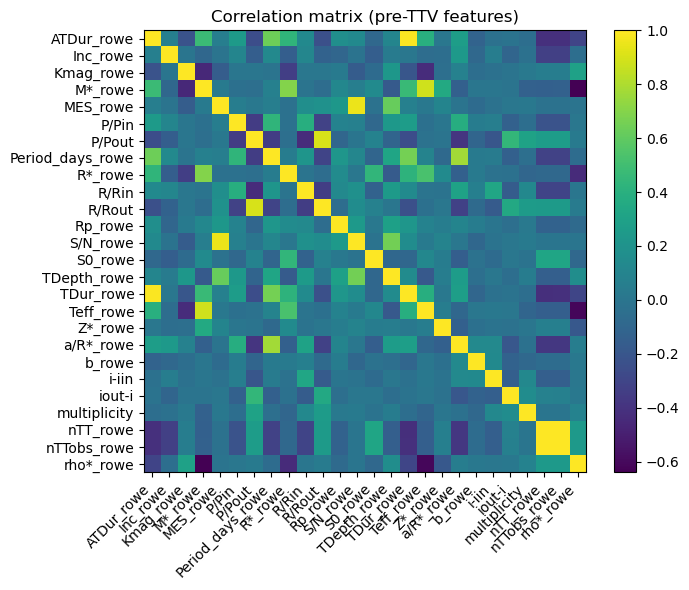

In [17]:
# corr_features = [
#     "Period_days_rowe",
#     "Rp_rowe",
#     "S0_rowe",
#     "multiplicity",
#     "P/Pin",
#     "P/Pout",
#     "MES_rowe",
#     "S/N_rowe",
#     "TDur_rowe",
# ]

corr_features = [f for f in feature_cols if f in pre_ttv_feature_cols]

corr = df_ml[corr_features].corr()

plt.figure(figsize=(8, 6))
im = plt.imshow(corr, interpolation="nearest")
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.xticks(range(len(corr_features)), corr_features, rotation=45, ha="right")
plt.yticks(range(len(corr_features)), corr_features)
plt.title("Correlation matrix (pre-TTV features)")
plt.tight_layout()
plt.show()


In [18]:
# unique planet IDs
planet_ids = df_ml[["KIC", "planet"]].drop_duplicates()
planet_ids["planet_key"] = planet_ids["KIC"].astype(str) + "_" + planet_ids["planet"].astype(str)

from sklearn.model_selection import train_test_split

train_planets, val_planets = train_test_split(
    planet_ids["planet_key"],
    test_size=0.25,
    random_state=42,
    stratify=df_ml.drop_duplicates(subset=["KIC", "planet"])["has_strong_TTV"]
)

# assign rows to train/val based on their planet_key
df_ml["planet_key"] = df_ml["KIC"].astype(str) + "_" + df_ml["planet"].astype(str)

train_mask = df_ml["planet_key"].isin(train_planets)
val_mask   = df_ml["planet_key"].isin(val_planets)

X_train = X[train_mask]
y_train = y[train_mask]
X_val   = X[val_mask]
y_val   = y[val_mask]

print("New train size:", X_train.shape, "New val size:", X_val.shape)
print("Train size:", X_train.shape, "Val size:", X_val.shape)
print("Train class balance:\n", y_train.value_counts(normalize=True))
print("Val class balance:\n", y_val.value_counts(normalize=True))

New train size: (1038000, 26) New val size: (346000, 26)
Train size: (1038000, 26) Val size: (346000, 26)
Train class balance:
 has_strong_TTV
0    0.814066
1    0.185934
Name: proportion, dtype: float64
Val class balance:
 has_strong_TTV
0    0.815029
1    0.184971
Name: proportion, dtype: float64


In [19]:
# X_train, X_val, y_train, y_val = train_test_split(
#     X, y,
#     test_size=0.25,
#     stratify=y,
#     random_state=42
# )

# print("Train size:", X_train.shape, "Val size:", X_val.shape)
# print("Train class balance:\n", y_train.value_counts(normalize=True))
# print("Val class balance:\n", y_val.value_counts(normalize=True))


In [20]:
logreg_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(
        max_iter=1000,
        class_weight="balanced",
        random_state=42
    ))
])

logreg_pipe.fit(X_train, y_train)

y_val_pred_logreg = logreg_pipe.predict(X_val)
y_val_proba_logreg = logreg_pipe.predict_proba(X_val)[:, 1]

print("=== Logistic Regression ===")
print("ROC-AUC:", roc_auc_score(y_val, y_val_proba_logreg))
print("\nClassification report:")
print(classification_report(y_val, y_val_pred_logreg))
print("Confusion matrix:")
print(confusion_matrix(y_val, y_val_pred_logreg))


=== Logistic Regression ===
ROC-AUC: 0.7743720947473405

Classification report:
              precision    recall  f1-score   support

           0       0.91      0.64      0.75    282000
           1       0.32      0.73      0.44     64000

    accuracy                           0.66    346000
   macro avg       0.61      0.69      0.60    346000
weighted avg       0.80      0.66      0.70    346000

Confusion matrix:
[[181482 100518]
 [ 17329  46671]]


In [21]:
rf_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("model", RandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        min_samples_split=5,
        min_samples_leaf=2,
        class_weight="balanced",
        random_state=42,
        n_jobs=-1
    ))
])

rf_pipe.fit(X_train, y_train)

y_val_pred_rf = rf_pipe.predict(X_val)
y_val_proba_rf = rf_pipe.predict_proba(X_val)[:, 1]

print("=== Random Forest ===")
print("ROC-AUC:", roc_auc_score(y_val, y_val_proba_rf))
print("\nClassification report:")
print(classification_report(y_val, y_val_pred_rf))
print("Confusion matrix:")
print(confusion_matrix(y_val, y_val_pred_rf))


=== Random Forest ===
ROC-AUC: 0.7515135521664451

Classification report:
              precision    recall  f1-score   support

           0       0.84      0.98      0.90    282000
           1       0.63      0.19      0.29     64000

    accuracy                           0.83    346000
   macro avg       0.74      0.58      0.60    346000
weighted avg       0.80      0.83      0.79    346000

Confusion matrix:
[[274963   7037]
 [ 51902  12098]]


<Figure size 600x600 with 0 Axes>

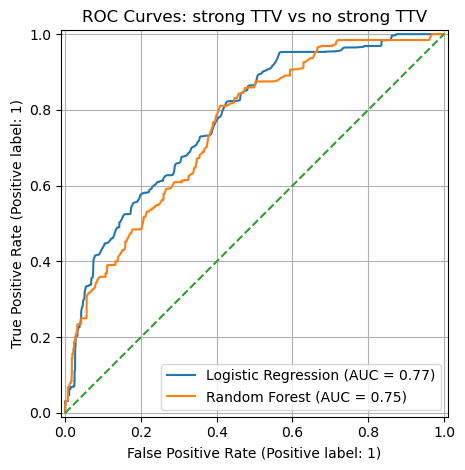

In [23]:
plt.figure(figsize=(6, 6))
RocCurveDisplay.from_predictions(
    y_val, y_val_proba_logreg,
    name="Logistic Regression"
)
RocCurveDisplay.from_predictions(
    y_val, y_val_proba_rf,
    name="Random Forest",
    ax=plt.gca()
)

plt.plot([0, 1], [0, 1], "--")
plt.title("ROC Curves: strong TTV vs no strong TTV")
plt.grid(True)
plt.tight_layout()
plt.show()


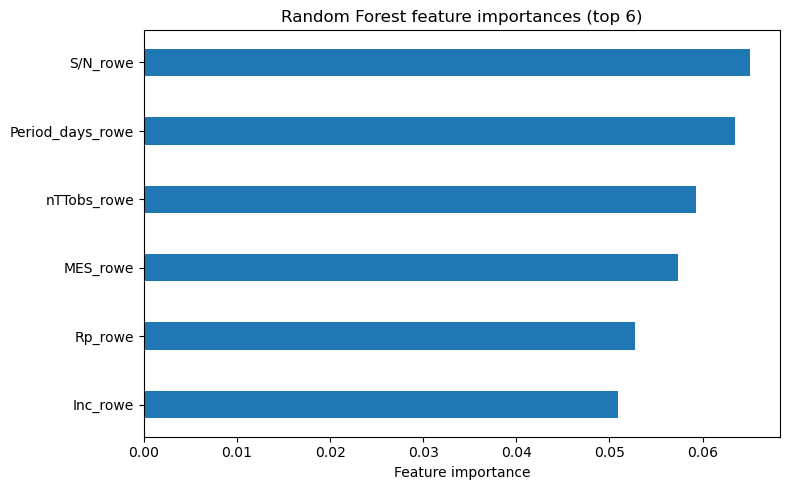

In [34]:
rf_model = rf_pipe.named_steps["model"]
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

top_n = 6
top_indices = indices[:top_n]

top_features = [feature_cols[i] for i in top_indices]
top_importances = importances[top_indices]

fig, ax = plt.subplots(figsize=(8, 5))  # shorter height

# height < 1.0 makes each bar thinner (try 0.4, 0.3, etc.)
ax.barh(range(top_n), top_importances, height=0.4)

ax.set_yticks(range(top_n))
ax.set_yticklabels(top_features)
ax.set_xlabel("Feature importance")
ax.set_title("Random Forest feature importances (top 6)")
ax.invert_yaxis()  # most important at top

fig.tight_layout()
fig.savefig("RF_Feature_Importance_thin.pdf", bbox_inches="tight")
plt.show()


